In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [3]:
# load data
train_df = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
train_extra_df = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
train_df = pd.concat([train_df, train_extra_df], axis=0, ignore_index=True)

In [4]:
# initial overview -- check dtypes, shape, number of NaNs, and range of values/weird min or max values
display(train_df.head(15).T, train_df.info(), train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Brand,Jansport,Jansport,Under Armour,Nike,Adidas,Nike,Nike,Puma,Under Armour,Under Armour,Nike,Nike,Adidas,Under Armour,Nike
Material,Leather,Canvas,Leather,Nylon,Canvas,Canvas,NaN,Canvas,Polyester,Nylon,Polyester,Polyester,Nylon,Leather,Polyester
Size,Medium,Small,Small,Small,Medium,Medium,Large,Small,Medium,Medium,Large,NaN,Medium,Medium,Small
Compartments,7.0,10.0,2.0,8.0,1.0,10.0,3.0,1.0,8.0,2.0,1.0,10.0,5.0,8.0,10.0
Laptop Compartment,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
Waterproof,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
Style,Tote,Messenger,Messenger,Messenger,Messenger,NaN,Backpack,Backpack,Tote,Messenger,Backpack,NaN,Backpack,Tote,Tote
Color,Black,Green,Red,Green,Green,Black,Green,Blue,Gray,Pink,NaN,Gray,Blue,Red,Green
Weight Capacity (kg),11.611723,27.078537,16.64376,12.93722,17.749338,7.241812,6.828123,21.488864,10.20778,15.8951,27.806951,13.697554,15.87205,26.079409,14.744147


None

,id,Compartments,Weight Capacity (kg),Price
count,3.994318e+06,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,5.434740e+00,1.801042e+01,8.136217e+01
std,1.178058e+06,2.893043e+00,6.973969e+00,3.893868e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,3.000000e+00,1.206896e+01,4.747002e+01
50%,2.197158e+06,5.000000e+00,1.805436e+01,8.098495e+01
75%,3.195738e+06,8.000000e+00,2.398751e+01,1.148550e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [5]:
# deal with numeric columns' missing values
numeric = train_df.drop(columns=["id", "Price"]).select_dtypes(include=['number']).columns
train_df[numeric] = train_df[numeric].fillna(train_df[numeric].mean())
test_df[numeric] = test_df[numeric].fillna(test_df[numeric].mean())
display(train_df.isnull().sum(), test_df.isnull().sum())

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)         0
Price                        0
dtype: int64

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)       0
dtype: int64

<Figure size 1500x3500 with 0 Axes>

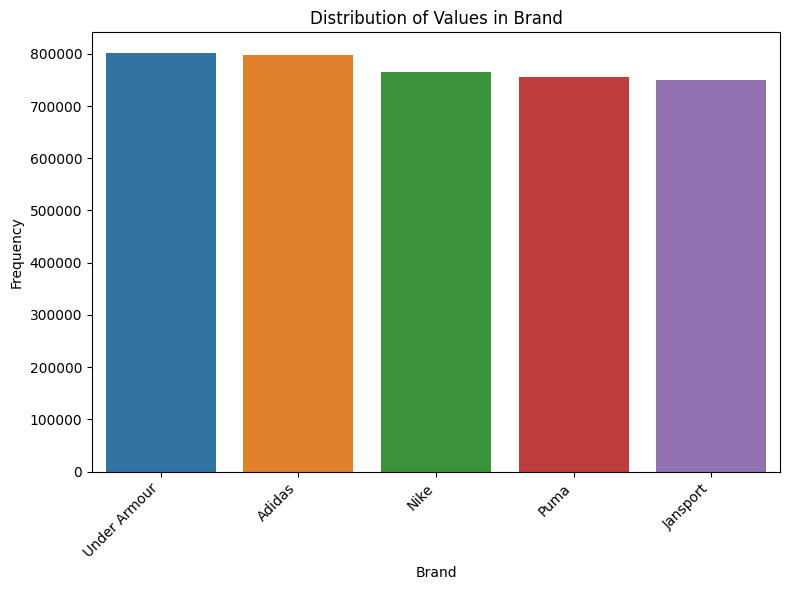

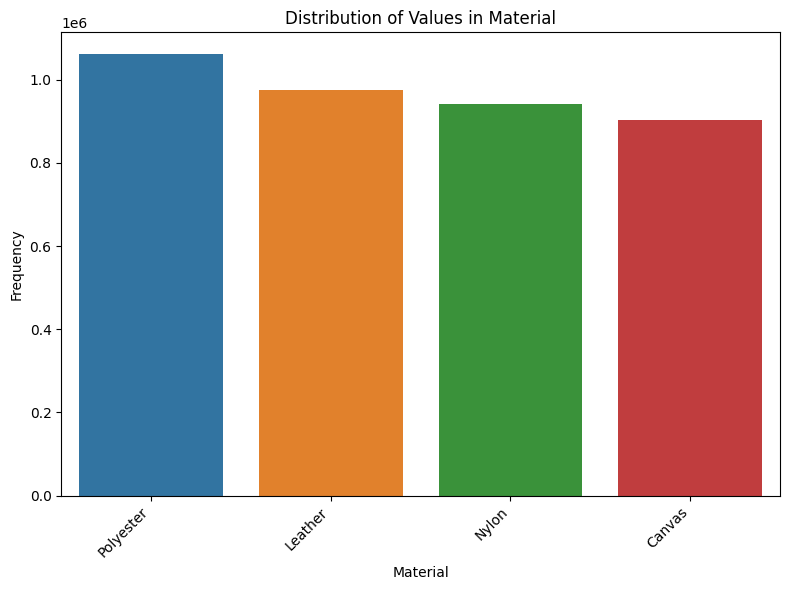

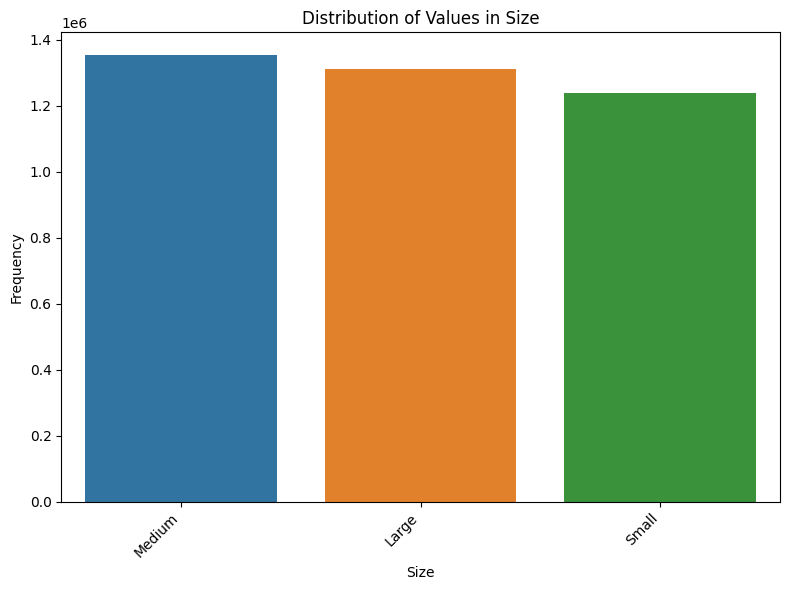

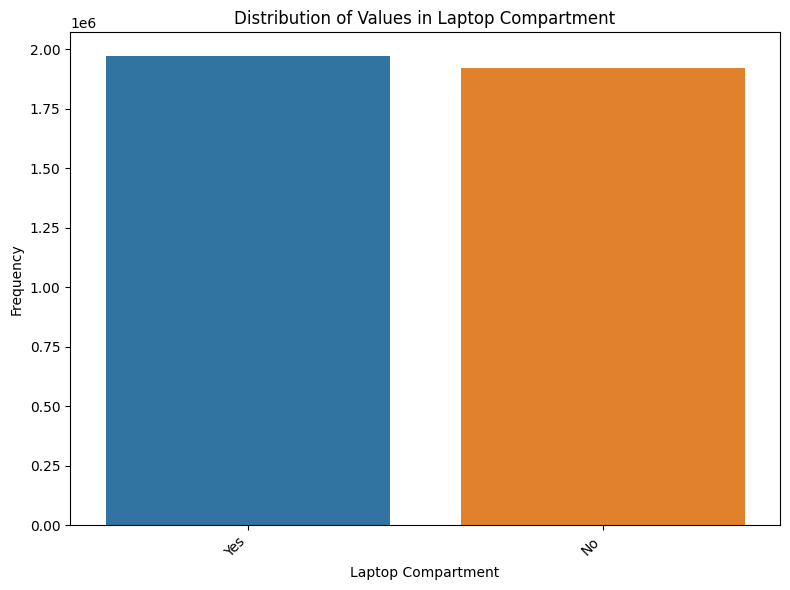

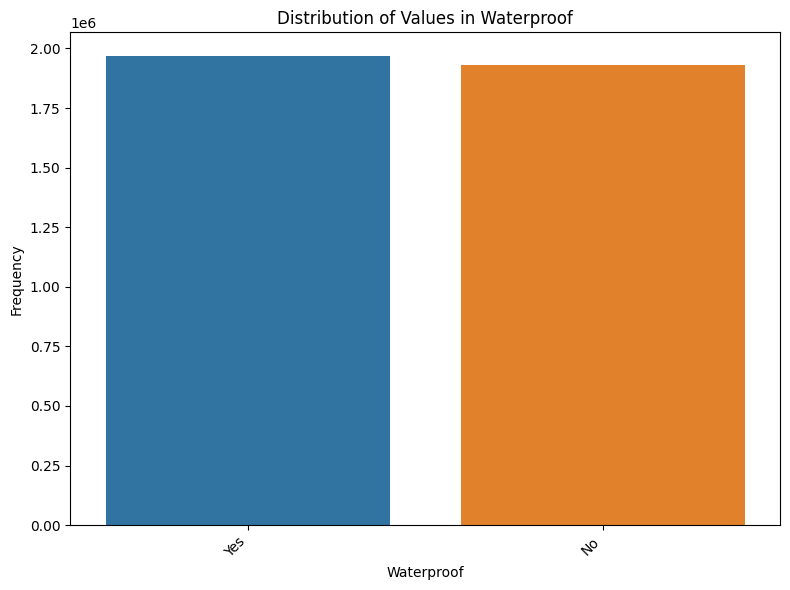

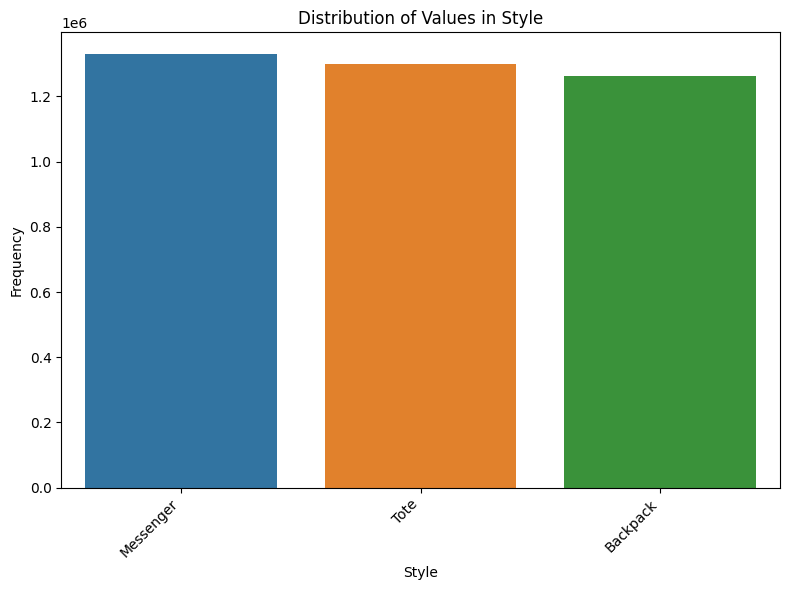

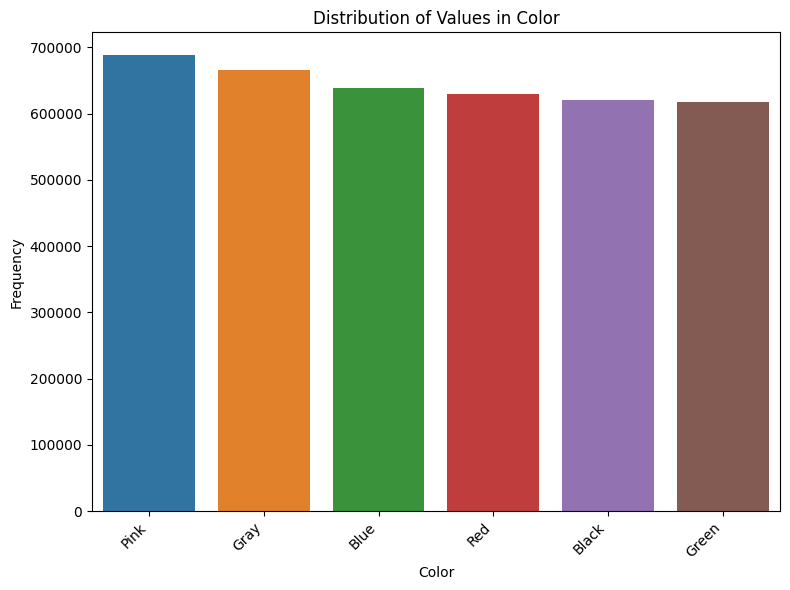

In [6]:
# view the distribution of values in each object column
import seaborn as sns
import matplotlib.pyplot as plt
categorical = train_df.select_dtypes(include='object').columns
plt.figure(figsize=(15, len(categorical) * 5))
for c in categorical:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=c, data=train_df, order=train_df[c].value_counts().index)
    plt.title(f'Distribution of Values in {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [7]:
# deal with object columns' missing values, using Random Imputer for more accurate imputation
# just using something such as the mode would ruin the balance already present
from sklearn.preprocessing import LabelEncoder

def process_data_with_distribution_imputer(train_df, test_df, cat_columns):
    """
    Process categorical data by:
    1. Encoding non-null values
    2. Imputing missing values based on observed distributions
    """
    # encoders
    label_encoders = {col: LabelEncoder() for col in cat_columns}
    
    # copies for processing
    train_processed = train_df.copy()
    test_processed = test_df.copy()
    
    for col in cat_columns:
        # fit encoder on non-null training values
        label_encoders[col].fit(train_df[col].dropna())
        
        # value distribution from training data
        train_dist = train_df[col].value_counts(normalize=True)
        
        # process training data
        # encode non-null values
        train_processed.loc[train_df[col].notna(), col] = label_encoders[col].transform(
            train_df[col][train_df[col].notna()]
        )
        
        # impute missing values based on distribution
        missing_train = train_df[col].isna()
        if missing_train.any():
            train_processed.loc[missing_train, col] = np.random.choice(
                label_encoders[col].transform(train_dist.index),
                size=missing_train.sum(),
                p=train_dist.values
            )
            
        # process test data
        # encode non-null values
        test_processed.loc[test_df[col].notna(), col] = label_encoders[col].transform(
            test_df[col][test_df[col].notna()]
        )
        
        # impute missing values based on training distribution
        missing_test = test_df[col].isna()
        if missing_test.any():
            test_processed.loc[missing_test, col] = np.random.choice(
                label_encoders[col].transform(train_dist.index),
                size=missing_test.sum(),
                p=train_dist.values
            )
    
    return train_processed, test_processed, label_encoders

In [8]:
display(train_df.head(15).T, test_df.head(15).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Brand,Jansport,Jansport,Under Armour,Nike,Adidas,Nike,Nike,Puma,Under Armour,Under Armour,Nike,Nike,Adidas,Under Armour,Nike
Material,Leather,Canvas,Leather,Nylon,Canvas,Canvas,NaN,Canvas,Polyester,Nylon,Polyester,Polyester,Nylon,Leather,Polyester
Size,Medium,Small,Small,Small,Medium,Medium,Large,Small,Medium,Medium,Large,NaN,Medium,Medium,Small
Compartments,7.0,10.0,2.0,8.0,1.0,10.0,3.0,1.0,8.0,2.0,1.0,10.0,5.0,8.0,10.0
Laptop Compartment,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
Waterproof,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
Style,Tote,Messenger,Messenger,Messenger,Messenger,NaN,Backpack,Backpack,Tote,Messenger,Backpack,NaN,Backpack,Tote,Tote
Color,Black,Green,Red,Green,Green,Black,Green,Blue,Gray,Pink,NaN,Gray,Blue,Red,Green
Weight Capacity (kg),11.611723,27.078537,16.64376,12.93722,17.749338,7.241812,6.828123,21.488864,10.20778,15.8951,27.806951,13.697554,15.87205,26.079409,14.744147


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,300000,300001,300002,300003,300004,300005,300006,300007,300008,300009,300010,300011,300012,300013,300014
Brand,Puma,Nike,Adidas,Adidas,NaN,Under Armour,Nike,Jansport,Nike,Puma,Adidas,Jansport,Puma,Under Armour,Nike
Material,Leather,Canvas,Canvas,Nylon,Nylon,Nylon,Nylon,Polyester,Canvas,Leather,Nylon,Leather,Leather,Leather,Leather
Size,Small,Medium,Large,Large,Large,Medium,Large,Medium,Large,Large,Small,Small,Large,Medium,Medium
Compartments,2.0,7.0,9.0,1.0,2.0,8.0,8.0,6.0,8.0,1.0,1.0,9.0,5.0,1.0,5.0
Laptop Compartment,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Waterproof,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No
Style,Tote,Backpack,Messenger,Messenger,Tote,Backpack,Tote,Backpack,Backpack,Tote,Tote,Backpack,Messenger,Messenger,Messenger
Color,Green,Green,Blue,Green,Black,Black,Blue,Blue,Red,Blue,Pink,Red,Blue,Green,Pink
Weight Capacity (kg),20.671147,13.564105,11.809799,18.477036,9.907953,17.547673,16.003025,24.238091,19.181167,9.937962,13.585978,14.051959,14.98751,19.543316,25.03124


In [9]:
# run imputing function to properly handle NaNs in categorical features
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 
               'Waterproof', 'Style', 'Color']

train_processed, test_processed, label_encoders = process_data_with_distribution_imputer(
    train_df=train_df,
    test_df=test_df,
    cat_columns=cat_columns
)

# make sure relative balance of unique values was preserved
for c in categorical:
    print(f"\nColumn: {c}")
    print("Original value counts:")
    print(train_df[c].value_counts(normalize=True).head())
    print("\nImputed value counts:")
    print(train_processed[c].value_counts(normalize=True).head())


Column: Brand
Original value counts:
Brand
Under Armour    0.207116
Adidas          0.206073
Nike            0.197646
Puma            0.195415
Jansport        0.193750
Name: proportion, dtype: float64

Imputed value counts:
Brand
4    0.207070
0    0.206094
2    0.197670
3    0.195474
1    0.193692
Name: proportion, dtype: float64

Column: Material
Original value counts:
Material
Polyester    0.273187
Leather      0.251377
Nylon        0.242743
Canvas       0.232694
Name: proportion, dtype: float64

Imputed value counts:
Material
3    0.273171
1    0.251384
2    0.242798
0    0.232647
Name: proportion, dtype: float64

Column: Size
Original value counts:
Size
Medium    0.346724
Large     0.335923
Small     0.317353
Name: proportion, dtype: float64

Imputed value counts:
Size
1    0.346711
0    0.335950
2    0.317339
Name: proportion, dtype: float64

Column: Laptop Compartment
Original value counts:
Laptop Compartment
Yes    0.506429
No     0.493571
Name: proportion, dtype: float64

Imp

In [10]:
# convert back to strings
for col in cat_columns:
    train_processed[col] = label_encoders[col].inverse_transform(train_processed[col].astype(int))
    test_processed[col] = label_encoders[col].inverse_transform(test_processed[col].astype(int))

In [11]:
display(train_processed.head(15).T, test_processed.head(15).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Brand,Jansport,Jansport,Under Armour,Nike,Adidas,Nike,Nike,Puma,Under Armour,Under Armour,Nike,Nike,Adidas,Under Armour,Nike
Material,Leather,Canvas,Leather,Nylon,Canvas,Canvas,Leather,Canvas,Polyester,Nylon,Polyester,Polyester,Nylon,Leather,Polyester
Size,Medium,Small,Small,Small,Medium,Medium,Large,Small,Medium,Medium,Large,Large,Medium,Medium,Small
Compartments,7.0,10.0,2.0,8.0,1.0,10.0,3.0,1.0,8.0,2.0,1.0,10.0,5.0,8.0,10.0
Laptop Compartment,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
Waterproof,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
Style,Tote,Messenger,Messenger,Messenger,Messenger,Backpack,Backpack,Backpack,Tote,Messenger,Backpack,Backpack,Backpack,Tote,Tote
Color,Black,Green,Red,Green,Green,Black,Green,Blue,Gray,Pink,Green,Gray,Blue,Red,Green
Weight Capacity (kg),11.611723,27.078537,16.64376,12.93722,17.749338,7.241812,6.828123,21.488864,10.20778,15.8951,27.806951,13.697554,15.87205,26.079409,14.744147


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,300000,300001,300002,300003,300004,300005,300006,300007,300008,300009,300010,300011,300012,300013,300014
Brand,Puma,Nike,Adidas,Adidas,Adidas,Under Armour,Nike,Jansport,Nike,Puma,Adidas,Jansport,Puma,Under Armour,Nike
Material,Leather,Canvas,Canvas,Nylon,Nylon,Nylon,Nylon,Polyester,Canvas,Leather,Nylon,Leather,Leather,Leather,Leather
Size,Small,Medium,Large,Large,Large,Medium,Large,Medium,Large,Large,Small,Small,Large,Medium,Medium
Compartments,2.0,7.0,9.0,1.0,2.0,8.0,8.0,6.0,8.0,1.0,1.0,9.0,5.0,1.0,5.0
Laptop Compartment,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Waterproof,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No
Style,Tote,Backpack,Messenger,Messenger,Tote,Backpack,Tote,Backpack,Backpack,Tote,Tote,Backpack,Messenger,Messenger,Messenger
Color,Green,Green,Blue,Green,Black,Black,Blue,Blue,Red,Blue,Pink,Red,Blue,Green,Pink
Weight Capacity (kg),20.671147,13.564105,11.809799,18.477036,9.907953,17.547673,16.003025,24.238091,19.181167,9.937962,13.585978,14.051959,14.98751,19.543316,25.03124


In [12]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

def fit_engineer_backpack_features(train_df, test_df=None, target_col='Price', random_state=42):
    """
    Engineer features for price prediction.
    If test_df is provided, applies the same transformations learned from train_df.
    """
    # copy to avoid modifying original
    train_engineered = train_df.copy()
    test_engineered = test_df.copy() if test_df is not None else None
    encoders = {}
    
    # categorical combinations
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Material_Size'] = df['Material'] + '_' + df['Size']
            df['Brand_Style'] = df['Brand'] + '_' + df['Style']
    
    # binary features
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Has_Laptop_Compartment'] = (df['Laptop Compartment'] == 'Yes').astype(int)
            df['Is_Waterproof'] = (df['Waterproof'] == 'Yes').astype(int)
            df['Capacity_per_Compartment'] = df['Weight Capacity (kg)'] / df['Compartments']
    
    # size-based groupings
    size_map = {'Small': 1, 'Medium': 2, 'Large': 3}
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Size_Numeric'] = df['Size'].map(size_map)
    
    # material quality tiers
    material_tiers = {
        'Canvas': 1,
        'Polyester': 2,
        'Nylon': 3,
        'Leather': 4
    }
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Material_Tier'] = df['Material'].map(material_tiers)
    
    # brand-based statistics
    weight_stats = train_engineered.groupby('Brand')['Weight Capacity (kg)'].agg(['mean', 'std']).fillna(0)
    weight_stats.columns = ['Brand_Weight_mean', 'Brand_Weight_std']
    
    if target_col in train_engineered.columns:
        price_stats = train_engineered.groupby('Brand')[target_col].agg(['mean', 'median', 'std']).fillna(0)
        price_stats.columns = ['Brand_Price_mean', 'Brand_Price_median', 'Brand_Price_std']
        brand_stats = pd.concat([weight_stats, price_stats], axis=1)
    else:
        brand_stats = weight_stats
    
    # merge stats to both dataframes
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df = df.merge(brand_stats, left_on='Brand', right_index=True, how='left')
    
    # style statistics if target column exists
    if target_col in train_engineered.columns:
        style_stats = train_engineered.groupby('Style')[target_col].agg(['mean', 'median', 'std']).fillna(0)
        style_stats.columns = ['Style_Price_mean', 'Style_Price_median', 'Style_Price_std']
        
        for df in [train_engineered, test_engineered]:
            if df is not None:
                df = df.merge(style_stats, left_on='Style', right_index=True, how='left')
    
    # material statistics if target column exists
    if target_col in train_engineered.columns:
        material_stats = train_engineered.groupby('Material')[target_col].agg(['mean', 'median', 'std']).fillna(0)
        material_stats.columns = ['Material_Price_mean', 'Material_Price_median', 'Material_Price_std']
        
        for df in [train_engineered, test_engineered]:
            if df is not None:
                df = df.merge(material_stats, left_on='Material', right_index=True, how='left')
    
    # handle categorical encoding
    # target encoding for high-cardinality features if target exists
    target_encode_cols = ['Brand', 'Material', 'Color', 'Brand_Style', 'Material_Size']
    
    if target_col in train_engineered.columns:
        for c in target_encode_cols:
            encoders[f'{c}_target'] = TargetEncoder(
                cols=[c],
                min_samples_leaf=1,
                smoothing=10,
                handle_missing='value',
                handle_unknown='value',
            )
            # fit on train
            encoders[f'{c}_target'].fit(train_engineered[[c]], train_engineered[target_col])
            
            # transform train and test
            train_engineered[f'{c}_encoded'] = encoders[f'{c}_target'].transform(train_engineered[[c]])
            if test_engineered is not None:
                test_engineered[f'{c}_encoded'] = encoders[f'{c}_target'].transform(test_engineered[[c]])
    
    # label encoding for low-cardinality features
    label_encode_cols = ['Size', 'Style']
    
    for c in label_encode_cols:
        encoders[f'{c}_label'] = LabelEncoder()
        # fit on train
        encoders[f'{c}_label'].fit(train_engineered[c])
        
        # transform train and test
        train_engineered[f'{c}_encoded'] = encoders[f'{c}_label'].transform(train_engineered[c])
        if test_engineered is not None:
            test_engineered[f'{c}_encoded'] = encoders[f'{c}_label'].transform(test_engineered[c])
    
    # interaction features
    for df in [train_engineered, test_engineered]:
        if df is not None:
            df['Capacity_Size_Interaction'] = df['Weight Capacity (kg)'] * df['Size_Numeric']
            df['Material_Capacity_Interaction'] = df['Material_Tier'] * df['Weight Capacity (kg)']
    
    if test_engineered is not None:
        return train_engineered, test_engineered, encoders
    else:
        return train_engineered, encoders

In [13]:
# create new features on train and test dataframes
train_engineered, test_engineered, encoders = fit_engineer_backpack_features(
    train_df=train_processed,
    test_df=test_processed,
    target_col='Price'
)

In [14]:
display(train_engineered.info(), test_engineered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   Brand                          object 
 2   Material                       object 
 3   Size                           object 
 4   Compartments                   float64
 5   Laptop Compartment             object 
 6   Waterproof                     object 
 7   Style                          object 
 8   Color                          object 
 9   Weight Capacity (kg)           float64
 10  Price                          float64
 11  Material_Size                  object 
 12  Brand_Style                    object 
 13  Has_Laptop_Compartment         int64  
 14  Is_Waterproof                  int64  
 15  Capacity_per_Compartment       float64
 16  Size_Numeric                   int64  
 17  Material_Tier                  int64  
 18  Br

None

None

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import optuna
import xgboost as xgb

def prepare_data_for_catboost(df_engineered):
    """
    Prepare data for CatBoost, keeping categorical columns as is.
    """
    return df_engineered.copy().drop(["Price"], axis=1)

def optimize_catboost(X, y, categorical_features, n_trials=100):
    """
    Optimized CatBoost hyperparameter tuning focusing on key parameters
    and using more focused search spaces.
    """
    def objective(trial):
        # larger validation set to speed up training
        X_train, X_valid, y_train, y_valid = train_test_split(
            X, y, test_size=0.3, random_state=42
        )
        
        train_pool = Pool(
            X_train, 
            y_train,
            cat_features=categorical_features
        )
        valid_pool = Pool(
            X_valid, 
            y_valid,
            cat_features=categorical_features
        )
        
        # base parameters 
        param = {
            'task_type': 'GPU',
            'loss_function': 'RMSE',
            'eval_metric': 'RMSE',
            'random_seed': 42,
            'bootstrap_type': 'Bernoulli',  # Fix bootstrap type to reduce search space
            'subsample': 0.8,               # Fixed reasonable value
            'random_strength': 1.0,         # Fixed reasonable value
            'max_bin': 254,                 # Speeds up training on GPU
            'min_data_in_leaf': 50,         # Fixed to prevent overfitting
            'grow_policy': 'Depthwise'      # Usually faster than Lossguide
        }
        
        # focus on most impactful parameters with narrower ranges since Optuna slow
        param.update({
            'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
            'depth': trial.suggest_int('depth', 5, 8),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 5.0)
        })
        
        model = CatBoostRegressor(**param)
        
        model.fit(
            train_pool,
            eval_set=valid_pool,
            early_stopping_rounds=50,
            verbose=False
        )
        
        preds = model.predict(valid_pool)
        rmse = np.sqrt(mean_squared_error(y_valid, preds))
        
        return rmse

    study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective, n_trials=n_trials, n_jobs=1)
    
    return study.best_params, study

In [16]:
def train_final_catboost(X_train, y_train, X_valid, y_valid, categorical_features, best_params):
    """
    Train final CatBoost model with best parameters.
    """
    train_pool = Pool(X_train, y_train, cat_features=categorical_features)
    valid_pool = Pool(X_valid, y_valid, cat_features=categorical_features)
    
    final_params = {
        **best_params,
        'task_type': 'GPU',
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'random_seed': 42
    }
    
    model = CatBoostRegressor(**final_params)
    
    model.fit(
        train_pool,
        eval_set=valid_pool,
        early_stopping_rounds=200,
        verbose=100
    )
    
    # evaluate
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    metrics = {
        'train_rmse': np.sqrt(mean_squared_error(y_train, train_preds)),
        'valid_rmse': np.sqrt(mean_squared_error(y_valid, valid_preds)),
        'train_r2': r2_score(y_train, train_preds),
        'valid_r2': r2_score(y_valid, valid_preds)
    }
    
    return model, metrics

In [46]:
def create_stacked_predictions(X, y, X_test, cat_model, modeling_features, n_folds=5):
    """
    Create stacked predictions using both CatBoost and XGBoost with optimized weights.
    """
    # arrays for predictions
    oof_predictions = np.zeros(len(X))
    test_predictions = np.zeros(len(X_test))
    
    # arrays to store individual model predictions for weight optimization
    oof_cat_predictions = np.zeros(len(X))
    oof_xgb_predictions = np.zeros(len(X))
    test_cat_predictions = np.zeros(len(X_test))
    test_xgb_predictions = np.zeros(len(X_test))

    # KFold
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # numerical-only features for XGBoost
    X_xgb = X[modeling_features]
    X_test_xgb = X_test[modeling_features]
    
    # XGBoost params
    xgb_params = {
        'learning_rate': 0.018046432068412444, 
        'max_depth': 4, 
        'min_child_weight': 7, 
        'subsample': 0.8671407998973113, 
        'colsample_bytree': 0.9452379423473304, 
        'gamma': 0.0075721601186984795, 
        'lambda': 0.1216874945507346, 
        'alpha': 4.787701508000442e-07,
        'device': 'cuda',
        'tree_method': 'hist',
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'random_state': 42
    }
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"Training fold {fold + 1}")
        
        # split
        X_train_full, X_val_full = X.iloc[train_idx], X.iloc[val_idx]
        X_train_xgb = X_xgb.iloc[train_idx]
        X_val_xgb = X_xgb.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # CatBoost predictions
        cat_train_pred = cat_model.predict(X_train_full)
        cat_val_pred = cat_model.predict(X_val_full)
        
        # store CatBoost validation predictions
        oof_cat_predictions[val_idx] = cat_val_pred
        
        # train XGBoost on residuals
        dtrain = xgb.DMatrix(X_train_xgb, label=y_train - cat_train_pred)
        dval = xgb.DMatrix(X_val_xgb, label=y_val - cat_val_pred)
        
        xgb_model = xgb.train(
            xgb_params,
            dtrain,
            num_boost_round=10000,
            evals=[(dtrain, 'train'), (dval, 'valid')],
            early_stopping_rounds=50,
            verbose_eval=False
        )
        
        # XGBoost predictions
        xgb_val_pred = xgb_model.predict(xgb.DMatrix(X_val_xgb))
        
        # store XGBoost validation predictions
        oof_xgb_predictions[val_idx] = xgb_val_pred
        
        # test predictions for both models
        cat_test_pred = cat_model.predict(X_test)
        xgb_test_pred = xgb_model.predict(xgb.DMatrix(X_test_xgb))
        
        test_cat_predictions += cat_test_pred / n_folds
        test_xgb_predictions += xgb_test_pred / n_folds
    
    # optimize weights
    def find_optimal_weights(cat_preds, xgb_preds, true_values):
        def objective(weight):
            weighted_preds = cat_preds + weight[0] * xgb_preds
            return np.sqrt(mean_squared_error(true_values, weighted_preds))
        
        # weights from 0 to 1
        weights = np.linspace(0, 1, 101)
        best_rmse = float('inf')
        best_weight = 0
        
        for w in weights:
            rmse = objective([w])
            if rmse < best_rmse:
                best_rmse = rmse
                best_weight = w
        
        return best_weight, best_rmse
    
    # find optimal weight using out-of-fold predictions
    optimal_weight, best_rmse = find_optimal_weights(oof_cat_predictions, oof_xgb_predictions, y)
    print(f"\nOptimal XGBoost weight: {optimal_weight:.3f}")
    print(f"Best RMSE: {best_rmse:.3f}")
    
    # final predictions using optimal weight
    oof_predictions = oof_cat_predictions + optimal_weight * oof_xgb_predictions
    test_predictions = test_cat_predictions + optimal_weight * test_xgb_predictions
    
    return oof_predictions, test_predictions, optimal_weight, best_rmse

In [18]:
modeling_features = [
    # numeric features
    'Compartments', 'Weight Capacity (kg)',
    'Capacity_per_Compartment', 'Size_Numeric', 'Material_Tier',
    
    # binary features
    'Has_Laptop_Compartment', 'Is_Waterproof',
    
    # target encoded features
    'Brand_encoded', 'Material_encoded', 'Color_encoded',
    'Brand_Style_encoded', 'Material_Size_encoded',
    
    # label encoded features
    'Size_encoded', 'Style_encoded',
    
    # interaction features
    'Capacity_Size_Interaction', 'Material_Capacity_Interaction'
]

# categorical features for CatBoost
categorical_features = [
    'Brand', 'Material', 'Size', 'Laptop Compartment',
    'Waterproof', 'Style', 'Color', 'Brand_Style', 'Material_Size'
]

# prepare data
X = prepare_data_for_catboost(train_engineered)
y = train_engineered['Price']

#best_params, study = optimize_catboost(X, y, categorical_features, n_trials=100)

In [21]:
#[I 2025-02-20 17:08:59,580] Trial 40 finished with value: 38.87184073009811 and parameters: {'learning_rate': 0.06965987621996231, 'depth': 5, 'l2_leaf_reg': 4.984901537620981}.

In [26]:
# hardcoded params after running Optuna to reduce runtime
cat_params = {
    'bootstrap_type': 'Bernoulli',  
    'subsample': 0.8,               
    'random_strength': 1.0,         
    'max_bin': 254,                 # speeds up training on GPU
    'min_data_in_leaf': 50,         # fixed to prevent overfitting
    'grow_policy': 'SymmetricTree',
    'learning_rate': 0.06965987621996231,
    'depth': 5,
    'l2_leaf_reg': 4.984901537620981
}

# split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# train
cat_model, cat_metrics = train_final_catboost(
    X_train, y_train, X_valid, y_valid, categorical_features, cat_params
)

# bestTest = 38.87765284
# bestIteration = 831
# Shrink model to first 832 iterations.

0:	learn: 38.9413862	test: 38.9127898	best: 38.9127898 (0)	total: 239ms	remaining: 3m 58s
100:	learn: 38.9082827	test: 38.8834944	best: 38.8834944 (100)	total: 20.4s	remaining: 3m 1s
200:	learn: 38.9045700	test: 38.8815246	best: 38.8815246 (200)	total: 42.6s	remaining: 2m 49s
300:	learn: 38.9001918	test: 38.8795568	best: 38.8795507 (279)	total: 1m 1s	remaining: 2m 23s
400:	learn: 38.8967194	test: 38.8782916	best: 38.8782648 (392)	total: 1m 21s	remaining: 2m 1s
500:	learn: 38.8940418	test: 38.8780815	best: 38.8780567 (454)	total: 1m 41s	remaining: 1m 41s
600:	learn: 38.8911703	test: 38.8778342	best: 38.8778342 (600)	total: 2m 2s	remaining: 1m 21s
700:	learn: 38.8885026	test: 38.8777806	best: 38.8777456 (671)	total: 2m 23s	remaining: 1m 1s
800:	learn: 38.8859686	test: 38.8777641	best: 38.8777229 (778)	total: 2m 43s	remaining: 40.6s
900:	learn: 38.8834077	test: 38.8778816	best: 38.8777229 (778)	total: 3m 3s	remaining: 20.2s
bestTest = 38.8777229
bestIteration = 778
Shrink model to first 7

In [27]:
print("Model performance:", cat_metrics)

# optimization history
#optuna.visualization.plot_optimization_history(study)

Model performance: {'train_rmse': 38.889616759685886, 'valid_rmse': 38.87772784569945, 'train_r2': 0.0028128187303648744, 'valid_r2': 0.0019494766030503374}


In [28]:
# need to run Optuna to do this
#optuna.visualization.plot_param_importances(study)

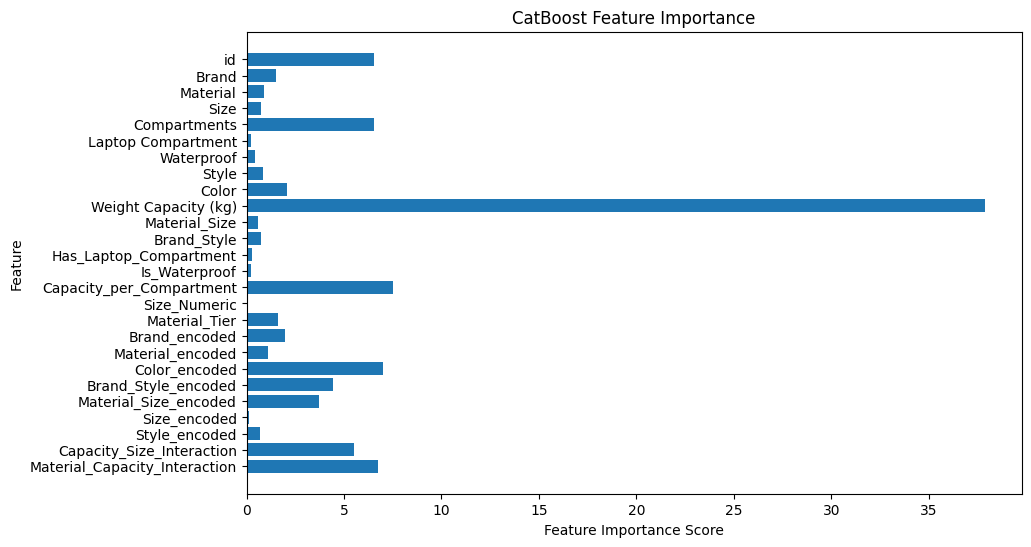

In [29]:
import matplotlib.pyplot as plt

# get feature importance
feature_importance = cat_model.get_feature_importance()
feature_names = X_train.columns

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [31]:
# prep test data
def prepare_test_data_for_catboost(df_engineered):
    """
    Prepare test data for CatBoost, keeping categorical columns as is.
    """
    return df_engineered.copy()


X_test = prepare_test_data_for_catboost(test_engineered)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             200000 non-null  int64  
 1   Brand                          200000 non-null  object 
 2   Material                       200000 non-null  object 
 3   Size                           200000 non-null  object 
 4   Compartments                   200000 non-null  float64
 5   Laptop Compartment             200000 non-null  object 
 6   Waterproof                     200000 non-null  object 
 7   Style                          200000 non-null  object 
 8   Color                          200000 non-null  object 
 9   Weight Capacity (kg)           200000 non-null  float64
 10  Material_Size                  200000 non-null  object 
 11  Brand_Style                    200000 non-null  object 
 12  Has_Laptop_Compartment        

In [44]:
# stacked predictions
oof_predictions, final_predictions, optimal_weight, best_rmse = create_stacked_predictions(
    X, y, X_test, cat_model, modeling_features
)

Training fold 1
Training fold 2
Training fold 3
Training fold 4
Training fold 5

Optimal XGBoost weight: 0.850
Best RMSE: 38.887


In [47]:
# evaluate stacked models
stack_rmse = np.sqrt(mean_squared_error(y, oof_predictions))
stack_r2 = r2_score(y, oof_predictions)

print("\nStacked Model Performance:")
print(f"RMSE: {stack_rmse:.3f}")
print(f"R2 Score: {stack_r2:.4f}")

print("\nStacked Prediction Statistics:")
print(pd.Series(final_predictions).describe())


Stacked Model Performance:
RMSE: 38.887
R2 Score: 0.0027

Stacked Prediction Statistics:
count    200000.000000
mean         81.415692
std           1.779417
min          61.778638
25%          80.377404
50%          81.529510
75%          82.606377
max          93.741324
dtype: float64


In [48]:
sample_sub = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")
sample_sub

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411
...,...,...
199995,499995,81.411
199996,499996,81.411
199997,499997,81.411
199998,499998,81.411


In [49]:
# submission dataframe
submission = pd.DataFrame({
    'id': test_df['id'],
    'Price': final_predictions
})

submission

,id,Price
0,300000,80.557446
1,300001,82.529714
2,300002,82.349971
3,300003,81.724521
4,300004,77.577419
...,...,...
199995,499995,79.946353
199996,499996,74.755121
199997,499997,82.496130
199998,499998,81.782284


In [50]:
# save
submission.to_csv('predictions.csv', index=False)